<a href="https://colab.research.google.com/github/handsome1201/FaceRecognition/blob/master/%EB%82%A8%EC%9E%90%EC%9D%BC%EA%B9%8C%EC%9A%94_%EC%97%AC%EC%9E%90%EC%9D%BC%EA%B9%8C%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.python.client import device_lib
from sklearn.utils import shuffle

load data

In [ ]:
train_file_0= os.listdir("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/남성664")
test_file_0= os.listdir("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_man100")
train_file_1= os.listdir("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/여성718")
test_file_1= os.listdir("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_woman100")




# train_file_0= os.listdir("저장장소")
# test_file_0= os.listdir("저장장소")
# train_file_1= os.listdir("저장장소")
# test_file_1= os.listdir("저장장소")

set train data

In [ ]:
X_train= 0
check= False

for file in train_file_0:
    img_data= load_img("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/남성664/"+file)
    img_arr= (img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)

    if(check== False):
        X_train= img
        check= True
    else:
        X_train= np.vstack((X_train, img))

for file in train_file_1:
    img_data= load_img("/content/drive/MyDrive/공소실 자료/archive/train_data/train_data/여성718/"+file)
    img_arr= (img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_train= np.vstack((X_train, img))

In [ ]:
y_train= np.array([0]* len(train_file_0))
y_train_1= np.array([1]* len(train_file_1))
y_train= np.append(y_train, y_train_1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

set test data

In [ ]:
X_test= 0
check= False

for file in test_file_0:
    img_data= load_img("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_man100/"+ file)
    img_arr= (img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    
    if(check== False):
        X_test= img
        check= True
    else:
        X_test= np.vstack((X_test, img))
        
for file in test_file_1:
    img_data= load_img("/content/drive/MyDrive/공소실 자료/archive/test_data/test_data_woman100/"+ file)
    img_arr= (img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_test= np.vstack((X_test, img))

In [ ]:
y_test= np.array([0]* len(test_file_0))
y_test_1= np.array([1]* len(test_file_1))
y_test= np.append(y_test, y_test_1)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train, y_train= shuffle(X_train, y_train, random_state= 42)
X_test, y_test= shuffle(X_test, y_test, random_state= 42)

save data

In [ ]:
np.save("/content/drive/MyDrive/공소실 자료/dataset/X_train", X_train)
np.save("/content/drive/MyDrive/공소실 자료/dataset/y_train", y_train)
np.save("/content/drive/MyDrive/공소실 자료/dataset/X_test", X_test)
np.save("/content/drive/MyDrive/공소실 자료/dataset/y_test", y_test)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.python.client import device_lib
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

load data

In [ ]:
X_train= np.load("/content/drive/MyDrive/공소실 자료/dataset/X_train.npy")
y_train= np.load("/content/drive/MyDrive/공소실 자료/dataset/y_train.npy")
X_test= np.load("/content/drive/MyDrive/공소실 자료/dataset/X_test.npy")
y_test= np.load("/content/drive/MyDrive/공소실 자료/dataset/y_test.npy")

build model

In [ ]:
model= keras.models.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(64, 10, activation= "relu", padding= "same", input_shape= [480, 480, 3]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation= "softmax"))

In [ ]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 480, 480, 64)      19264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 240, 240, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 240, 240, 128)     131200    
                                                                 
 conv2d_10 (Conv2D)          (None, 240, 240, 128)     262272    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 120, 128)    0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 120, 120, 256)    

train

In [ ]:
history= model.fit(X_train, y_train, epochs=40)

InternalError: ignored

check loss and accuracy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

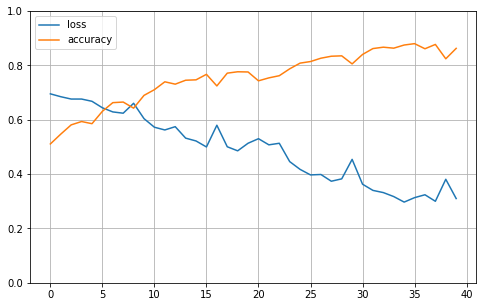

In [ ]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

use test data

In [ ]:
y_predicted= model.predict(X_test)
y_pred = y_predicted.argmax(axis=-1)

7/7 [==============================] - 3s 533ms/step


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5

In [ ]:
from keras.models import load_model

model.save('girl_boy_predict')

In [ ]:
from keras.models import load_model
model = load_model('girl_boy_predict')

ResourceExhaustedError: ignored

데이터를 확인해 볼 사진을 지정 위치에 남녀 구분해서 값을 저장

In [ ]:
from keras.utils import image_utils

test0= os.listdir("/content/drive/MyDrive/공소실 자료/archive/제목없는 폴더/남자")
test1= os.listdir("/content/drive/MyDrive/공소실 자료/archive/제목없는 폴더/여자")

X_test_what= 0
check= False

for file in test0:
    img_data= image_utils.load_img("/content/drive/MyDrive/공소실 자료/archive/제목없는 폴더/남자/"+ file)
    img_arr= (image_utils.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    
    if(check== False):
        X_test_what= img
        check= True
    else:
        X_test_what= np.vstack((X_test_what, img))
        
for file in test1:
    img_data= image_utils.load_img("/content/drive/MyDrive/공소실 자료/archive/제목없는 폴더/여자/"+ file)
    img_arr= (image_utils.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_test_what= np.vstack((X_test_what, img))
    

y_test_what= np.array([0]* len(test0))
y_test_1= np.array([1]* len(test1))
y_test_what= np.append(y_test_what, y_test_1)

In [ ]:
y_predicted= model.predict(X_test_what)
y_pred1 = y_predicted.argmax(axis=-1)

In [ ]:
y_pred1

In [ ]:
y_pred

check accuracy

In [ ]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_pred[i]):
        accuracy+= 1
        
print(accuracy/len(y_test))

확인하고 싶은 사진 결과 확인인

In [ ]:
import matplotlib.pyplot as plt


for a in range(len(y_pred1)):

  plt.rcParams['figure.figsize'] = (5, 5) 
  plt.imshow(X_test_what[a])
  plt.show()


  if (y_pred1[a]==1):
      print("예측: 여성",accuracy_score(y_test,y_pred)*100,"%")
      if(y_test_what[a]==0):
        print("정답: 남성")
      else:
        print("정답: 여성")
  else:
      print("예측: 남성",accuracy_score(y_test,y_pred)*100,"%")
      if(y_test_what[a]==0):
        print("정답: 남성")
      else:
        print("정답: 여성")